In [1]:
from ipynb.fs.full.fft import fft   #imported from fft.py code

In [2]:
from ipynb.fs.full.logstretch import logTransform     #imported from logstretch.py code

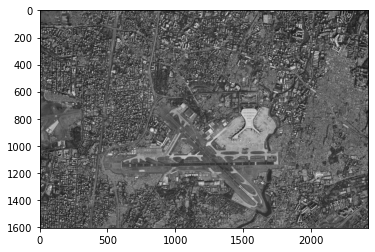

<Figure size 432x288 with 0 Axes>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/Users/mainak01/Desktop/SIP/satellite.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()
plt.savefig('output.png', dpi=300)

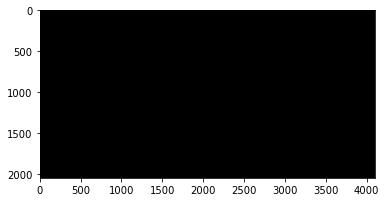

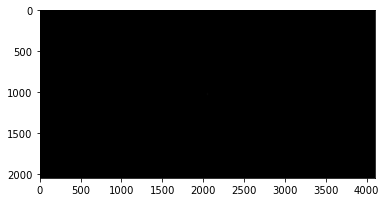

In [41]:
#taking fourier transfrom of image
fft1 = fft(image)
output = fft1.fft2d(image)
plt.imshow(np.abs(output), cmap= 'gray')
plt.show()

#shifting Fourier Transform to center
shift_output = fft1.shifting(output)
plt.imshow(np.abs(shift_output), cmap= 'gray')
plt.show()

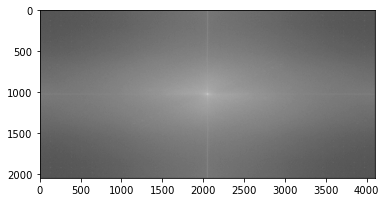

In [42]:
# Logrithmic stretch of Fourier transfom magnitude
transform = logTransform(np.abs(shift_output))
plt.imshow(transform.logTransformImage(), cmap='gray')
plt.show()

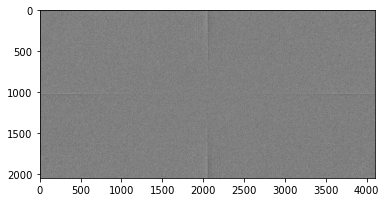

In [43]:
#phase plot of Fourier Transformed image
plt.imshow(np.angle(shift_output), cmap= 'gray')
plt.show()

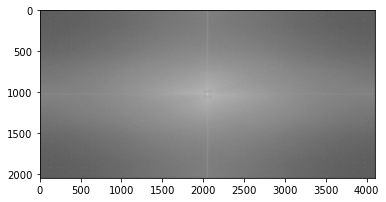

In [49]:
# Applying High Boost filter with boosting coefficient is 2.0 
    # taking 100 * 100 window at centre 
Boost_coef = 2.0
window_size = 100//2
M,N = shift_output.shape
centre_pixels = shift_output[M//2-window_size:M//2+window_size, N//2-window_size:N//2+window_size]
high_boost = Boost_coef*shift_output
high_boost[M//2-window_size:M//2+window_size, N//2-window_size:N//2+window_size] = centre_pixels
transform = logTransform(np.abs(high_boost))
plt.imshow(transform.logTransformImage(), cmap='gray')
plt.show()

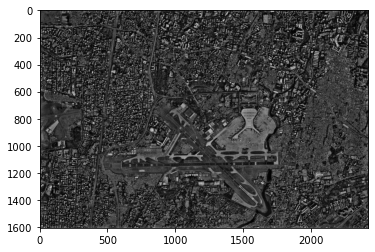

In [45]:
# Applying Inverse Fourier Transform
sharped_image = fft1.ifft2d(high_boost)
plt.imshow(np.abs(sharped_image).astype(int), cmap='gray')
plt.show()